In [1]:
# Libraries for data preparation & visualization
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "png"

# Ignore printing warnings for general readability
import warnings 
warnings.filterwarnings("ignore")

# pip install scikit-surprise
# Importing libraries for model building & evaluation
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise import accuracy

In [2]:
# Loading the dataset 
def loaddata(filename):
    df = pd.read_csv(f'{filename}.csv',sep=';',error_bad_lines=False,warn_bad_lines=False,encoding='latin-1')
    return df

book   = loaddata("BX-Books")
user   = loaddata("BX-Users")
rating = loaddata("BX-Book-Ratings")

In [3]:
print("shape of Users :",user.shape)
print("shape of books :",book.shape)
print("shape of ratings :",rating.shape)

shape of Users : (278858, 3)
shape of books : (271360, 8)
shape of ratings : (1149780, 3)


In [4]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
# Check for duplicate values
print(f'Duplicate entries book: {book.duplicated().sum()}')
print(f'Duplicate entries rating: {rating.duplicated().sum()}')
print(f'Duplicate entries user: {user.duplicated().sum()}')

Duplicate entries book: 0
Duplicate entries rating: 0
Duplicate entries user: 0


In [11]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [12]:
# Missing value percentage
print(book.isnull().sum()/len(book)*100)
print("="*35)
print(rating.isnull().sum()/len(rating)*100)
print("="*35)
print(user.isnull().sum()/len(user)*100)

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64
User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64
User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64


In [13]:
# Missing value percentage
print(book.isnull().sum())
print("="*35)
print(rating.isnull().sum())
print("="*35)
print(user.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64


In [14]:
#Preprocessing Data
book = book[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
book.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
user.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
rating.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

<AxesSubplot:xlabel='rating', ylabel='count'>

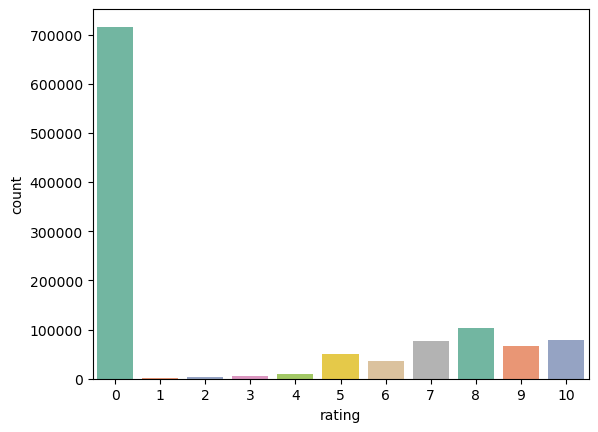

In [15]:
sns.countplot(x='rating',data=rating, palette = 'Set2')

In [16]:
#ratings should only exist for the books given in the dataset
ratings_new=rating[rating.ISBN.isin(book.ISBN)]

In [17]:
print(rating.shape)
print(ratings_new.shape)


(1149780, 3)
(1031136, 3)


In [18]:
ratings_explicit=ratings_new[ratings_new['rating']!=0]
ratings_implicit=ratings_new[ratings_new['rating']==0]

In [19]:
print(ratings_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(1031136, 3)
(383842, 3)
(647294, 3)


In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'\nMost popular ratings\n'}, xlabel='rating', ylabel='count'>

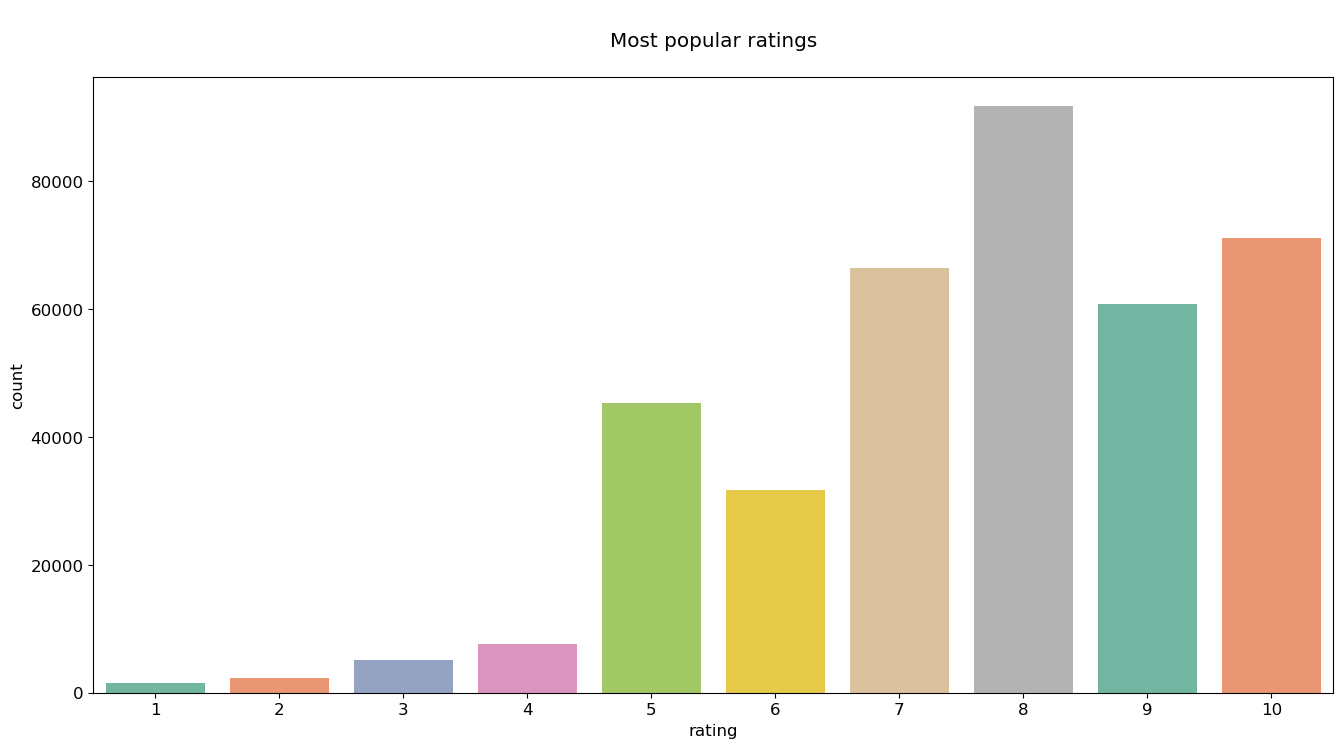

In [21]:
# most popular rating
plt.figure(figsize=[16,8])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=ratings_explicit, x='rating', palette='Set2')

In [22]:
user['age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

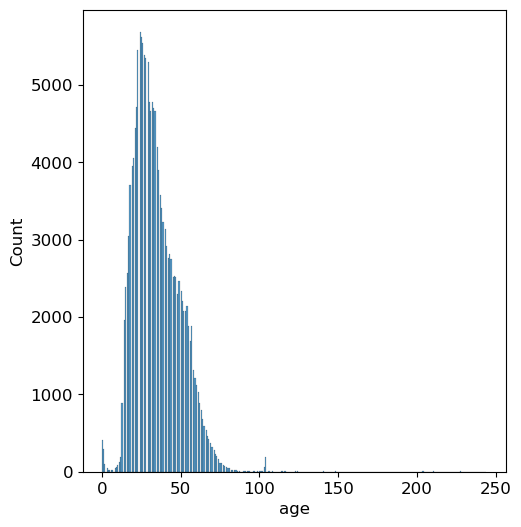

In [23]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='age',data=user,)

In [24]:
user['location'].nunique()

57339

In [25]:
user

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [26]:
#Displaying the country names
set(user['location'])

{'fpo, new york, usa',
 'manarola - la spezia, liguria, italy',
 'hoylake, england, united kingdom',
 'oahu, hawaii, usa',
 'tongzhou, beijing, china',
 'wahington, illinois, usa',
 'greifswald, ,',
 'somero, varsinais-suomi, finland',
 'mexico city, df., mexico',
 'lisboa, south, portugal',
 'lodnon, ontario, canada',
 'hedehusene., denmark, denmark',
 'rostock, mississippi, germany',
 'bergisch gladbach, nordrhein - westfalen, germany',
 'lefroy, ontario, canada',
 'artesia, new mexico, usa',
 'hessmer, louisiana, usa',
 'cumana, sucre, venezuela',
 'mt. kisco, new york, usa',
 'whitehorse, yukon territory, canada',
 'toluca, estado de mexico, mexico',
 'sertãozinho, são paulo, brazil',
 'holt, molise, usa',
 'kirchberg, rheinland-pfalz, germany',
 'wohltorf, hamburg, germany',
 'florence, vermont, usa',
 'villeneuve d`ascq, france, france',
 'calabasas, california, usa',
 'kingsland, georgia, usa',
 'naylor, missouri, usa',
 'otterfing, bayern, germany',
 'stuttgart, baden würtember

In [27]:
# most popular books
ratings_new.groupby('ISBN')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]

,ISBN,rating
215952,0971880107,2502
38570,0316666343,1295
70798,0385504209,883
7344,0060928336,732
32370,0312195516,723
87397,044023722X,647
21342,0142001740,615
145042,067976402X,614
133142,0671027360,586
93847,0446672211,585


In [28]:
# most popular explicitely rated books
ratings_explicit.groupby('ISBN')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]

,ISBN,rating
21945,0316666343,707
117745,0971880107,581
38819,0385504209,487
18058,0312195516,383
4131,0060928336,320
68898,059035342X,313
12325,0142001740,307
51799,0446672211,295
47986,044023722X,281
57625,0452282152,278


In [29]:
#Merge ratings with books
rating_with_books = ratings_new.merge(book, on='ISBN')
rating_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [30]:
# Here we had created a ratings dataframe with average rating and number of ratings
rating_with_books.groupby('title')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

,title,rating
66223,Film Is: The International Free Cinema,10.0
123125,More Secrets of Happy Children: Embrace Your P...,10.0
96558,Jo's Boys : From the Original Publisher,10.0
212107,The Vanished Priestess : An Annie Szabo Mystery,10.0
72503,Game and Hunting,10.0
...,...,...
93628,Invaders of the Planet Earth (Choose Your Own ...,0.0
154021,Sammy Discovers the Alphabet (Learn-With-Sammy),0.0
154019,Sammy Carducci's Guide to Women,0.0
154018,Sammle mir Kiesel am FluÃ?Â?. Mehr als eine Li...,0.0


In [31]:
rating_with_books.groupby('title')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]

,title,rating
234951,Wild Animus,2502
196326,The Lovely Bones: A Novel,1295
183573,The Da Vinci Code,898
5303,A Painted House,838
199237,The Nanny Diaries: A Novel,828
27922,Bridget Jones's Diary,815
206502,The Secret Life of Bees,774
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
204387,The Red Tent (Bestselling Backlist),723
14392,Angels &amp; Demons,670


<AxesSubplot:title={'center':'\nMost popular books\n'}, xlabel='Count', ylabel='title'>

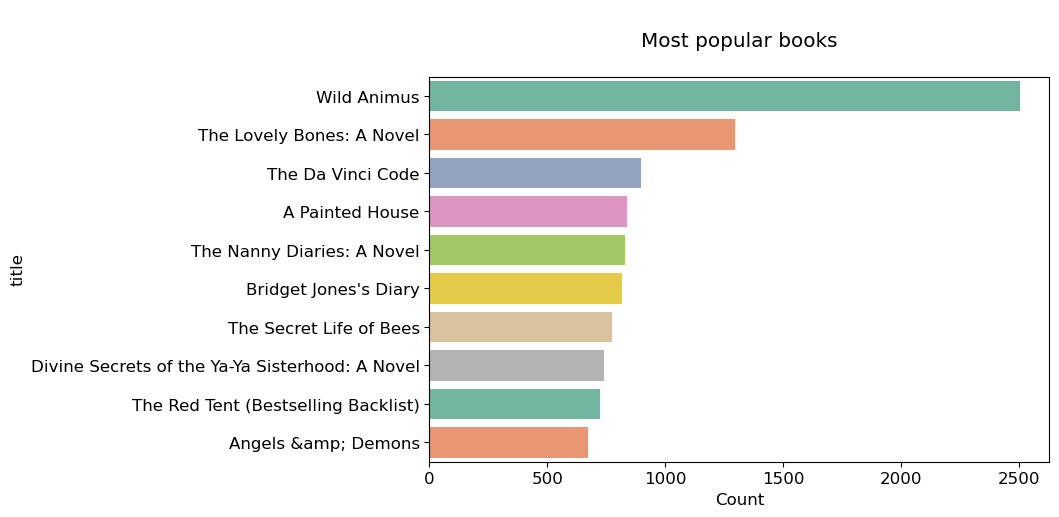

In [32]:
# top 10 most popular books

popular = rating_with_books.groupby('title')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]
popular.columns = ['title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='title', x='Count',palette='Set2')

In [33]:
rating_with_books.groupby('ISBN')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)[:10]

,ISBN,rating
231152,1575848236,10.0
24662,0195061659,10.0
195985,0871359057,10.0
195986,0871359243,10.0
195987,0871359251,10.0
222211,1559639407,10.0
24674,0195065107,10.0
195989,0871400332,10.0
65191,0380763796,10.0
11117,0062733834,10.0


<AxesSubplot:title={'center':'\nMost popular books\n'}, xlabel='Count', ylabel='ISBN'>

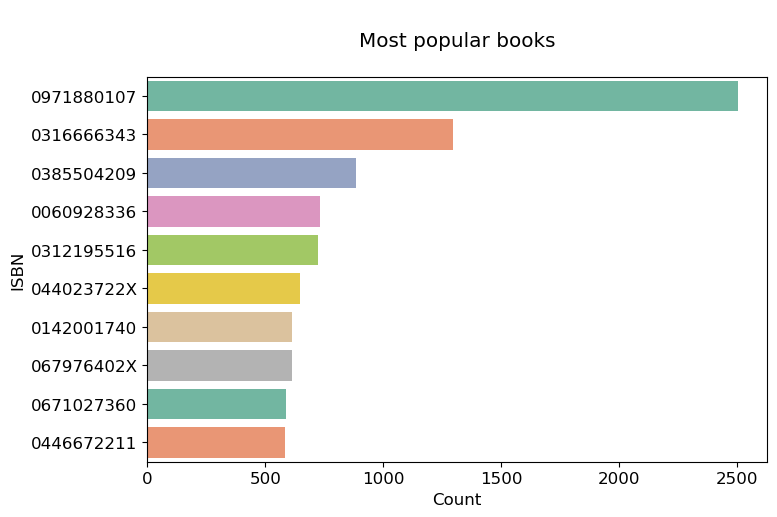

In [34]:
# top 10 most popular books

popular = rating_with_books.groupby('ISBN')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]
popular.columns = ['ISBN', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='ISBN', x='Count',palette='Set2')

In [35]:
# most popular books
ratings_new.groupby('ISBN')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]

,ISBN,rating
215952,0971880107,2502
38570,0316666343,1295
70798,0385504209,883
7344,0060928336,732
32370,0312195516,723
87397,044023722X,647
21342,0142001740,615
145042,067976402X,614
133142,0671027360,586
93847,0446672211,585


In [36]:
# here will show 10 books with the highest average rating
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
rating_with_books[rating_with_books['ISBN'].isin(isbn_nums)]

,user_id,ISBN,rating,title,author,year,publisher
6574,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
6575,277195,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
6576,277413,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
6577,277427,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
6578,277439,0316666343,7,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
...,...,...,...,...,...,...,...
94056,275050,0446672211,8,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
94057,275585,0446672211,0,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
94058,275809,0446672211,9,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
94059,275922,0446672211,0,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books


In [37]:
# here will show 10 books with the highest average rating
isbn_nums = ['1575848236', '0195061659', '0871359057', '0871359243	',
       '0871359251', '1559639407', '0195065107', '0871400332',
       '0380763796', '0062733834']
rating_with_books[rating_with_books['ISBN'].isin(isbn_nums)]

,user_id,ISBN,rating,title,author,year,publisher
599015,23768,0195065107,10,The Oxford Companion to African American Liter...,William L. Andrews,1997,Oxford University Press
786161,63714,0871359057,10,Dinosaurs: A Celebration,Dan Abnett,1992,Client Distribution Services
786163,63714,0871359251,10,Dinosaurs: A Celebration,Dan Abnett,1992,Client Distribution Services
815513,76499,0195061659,10,Prometheus Bound (Greek Tragedy in New Transla...,Aeschylus,1989,Oxford University Press
836478,86947,0871400332,10,Expressionism In Art,Sheldon Cheney,0,Norton*(ww Norton Co
895956,119749,1575848236,10,To The Rescue (Move and Play),Matt Mitter,2001,Reader's Digest
987529,209148,0380763796,10,Tons of Trash: Why You Should Recycle and What...,Joan Rattner Heilman,1992,Avon Books
997152,221753,0062733834,10,Alt. Culture: An A-To-Z Guide to the '90S-Unde...,Nathaniel Wice,1995,Harpercollins
1018199,250405,1559639407,10,Fatal Harvest: The Tragedy of Industrial Agric...,Andrew Kimbrell,2002,Foundation for Deep Ecology


In [38]:
ratingbook = pd.DataFrame(rating_with_books.groupby('ISBN')['rating'].mean())
ratingbook.head()

,rating
ISBN,
0000913154,8.0
0001010565,0.0
0001046438,9.0
0001046713,0.0
000104687X,6.0


In [39]:
# Now set the number of ratings column (add)
ratingbook['num of ratings'] = pd.DataFrame(rating_with_books.groupby('ISBN')['rating'].count())
ratingbook.head()

,rating,num of ratings
ISBN,,
0000913154,8.0,1
0001010565,0.0,2
0001046438,9.0,1
0001046713,0.0,1
000104687X,6.0,1


<AxesSubplot:title={'center':'\nMost popular Authors\n'}, xlabel='rating', ylabel='author'>

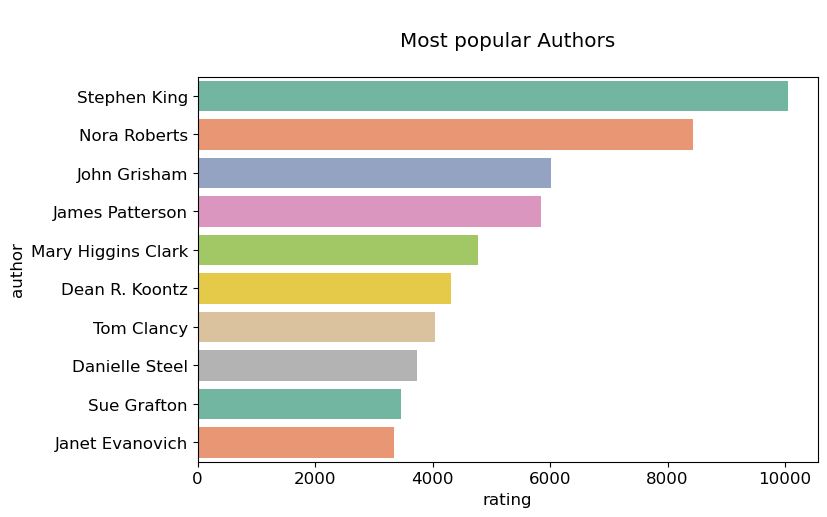

In [40]:
# most popular book authors
author = rating_with_books.groupby('author')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='author', x='rating',palette='Set2')

<AxesSubplot:title={'center':'\nTop 10 authors with the most books\n'}, xlabel='count', ylabel='authors'>

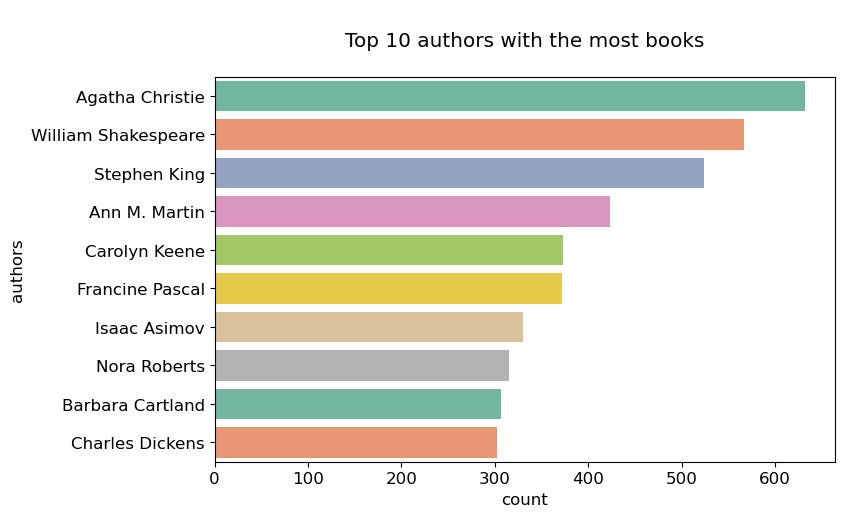

In [41]:
# Authors with the most books
authors = book['author'].value_counts()
top_authors = authors.head(10).reset_index()
top_authors.columns = ['authors', 'count']
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nTop 10 authors with the most books\n')
sns.barplot(x=top_authors['count'], y=top_authors['authors'],
            palette='Set2', )

<AxesSubplot:>

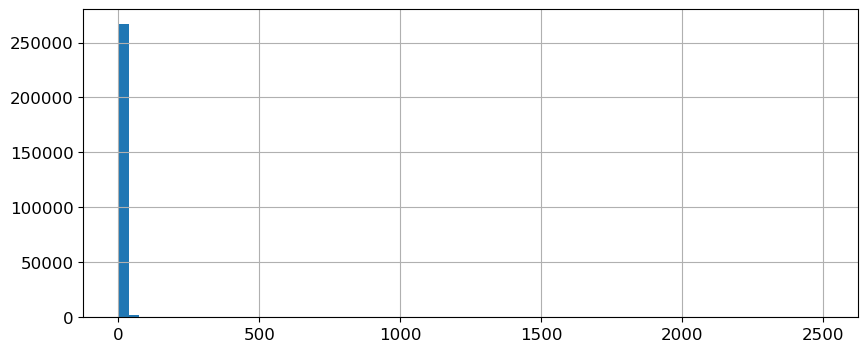

In [42]:
# Now we ploted some histograms 

plt.figure(figsize=(10,4))
ratingbook['num of ratings'].hist(bins=70)

<AxesSubplot:>

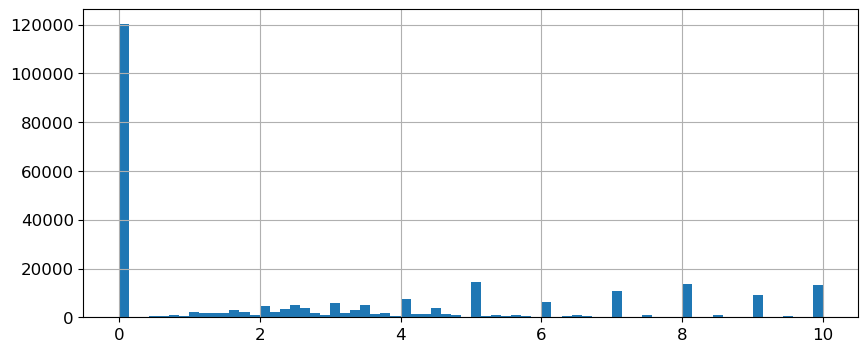

In [43]:
plt.figure(figsize=(10,4))
ratingbook['rating'].hist(bins=70)

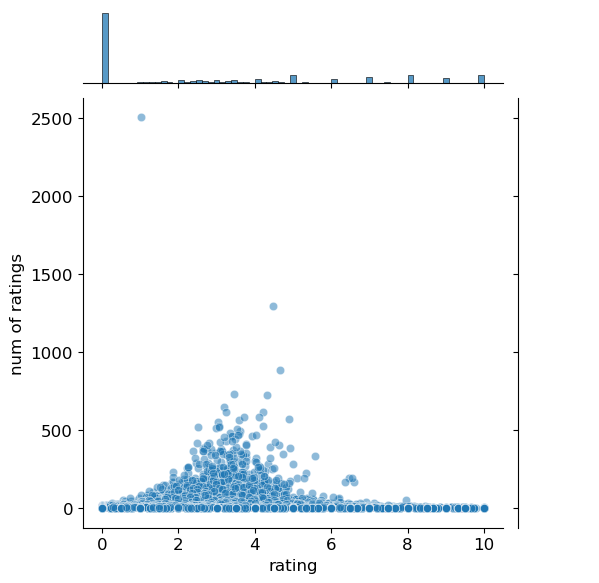

In [44]:
sns.jointplot(x='rating',y='num of ratings',data=ratingbook,alpha=0.5)

<AxesSubplot:title={'center':'\nMost popular books\n'}, xlabel='Count', ylabel='ISBN'>

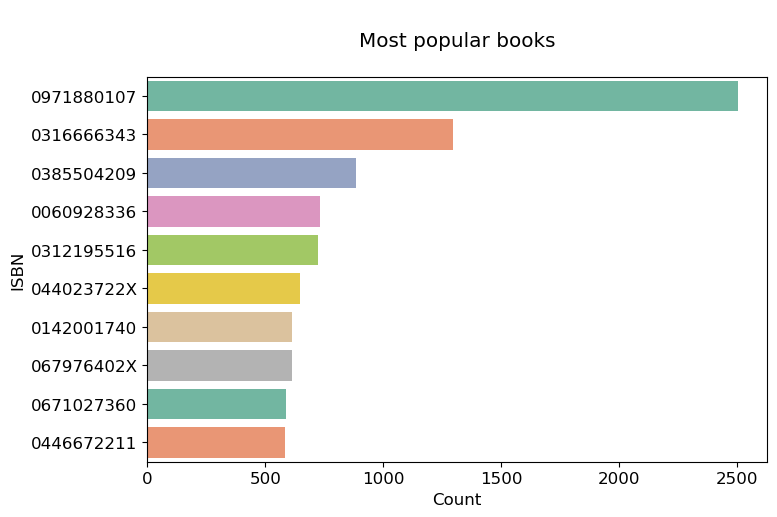

In [45]:
# top 10 most popular books

popular = rating_with_books.groupby('ISBN')['rating'].count().reset_index().sort_values(by='rating', ascending=False)[:10]
popular.columns = ['ISBN', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='ISBN', x='Count',palette='Set2')

In [46]:
x = rating['user_id'].value_counts() > 200
y = x[x].index  #user_ids
print(y.shape)

(899,)


In [47]:
rating_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


<AxesSubplot:xlabel='age'>

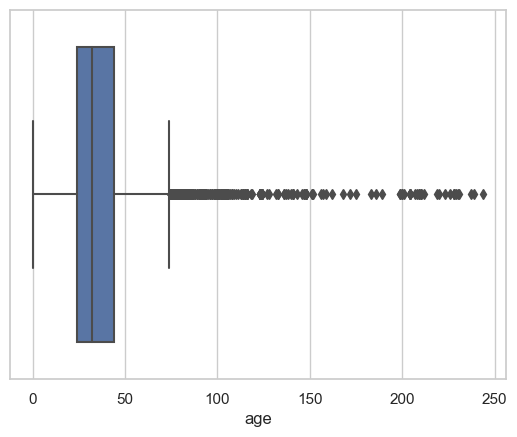

In [48]:
sns.set(style="whitegrid")
sns.boxplot(x='age',data=user)

Text(0.5, 1.0, 'Number of books by an author (Top 20)')

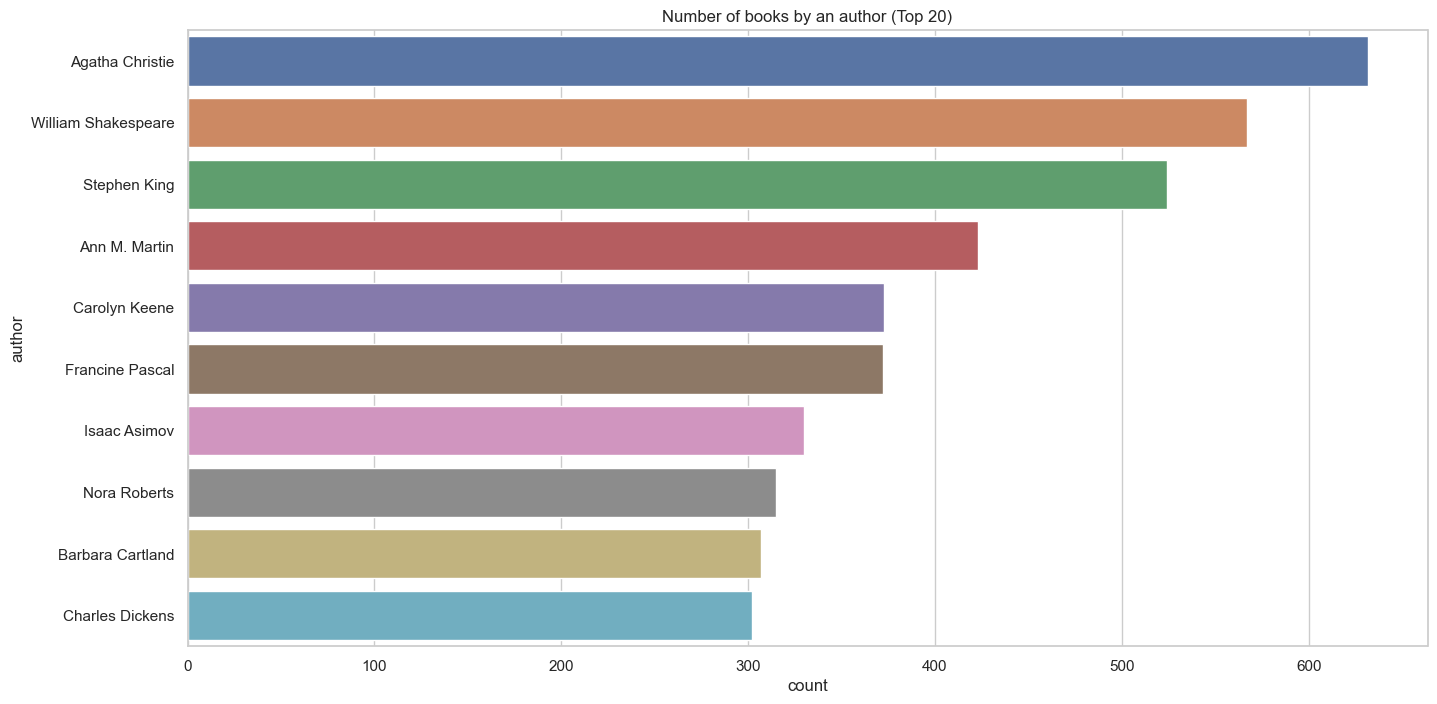

In [49]:
#number of books published by an author (top-20)
plt.figure(figsize=(16,8))
sns.countplot(y="author", data=book,order=book['author'].value_counts().index[0:10])
plt.title("Number of books by an author (Top 20)")

In [56]:
num_rating = rating_with_books.groupby('title')['rating'].count().reset_index()
num_rating.rename(columns={'rating': 'num_rating'}, inplace = True)
num_rating

,title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [58]:
avg_rating = rating_with_books.groupby('title').mean()['rating'].reset_index()
avg_rating.rename(columns={'rating':'avg_rating'},inplace = True)
avg_rating

,title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [61]:
popular = num_rating.merge(avg_rating,on = 'title')
popular

,title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


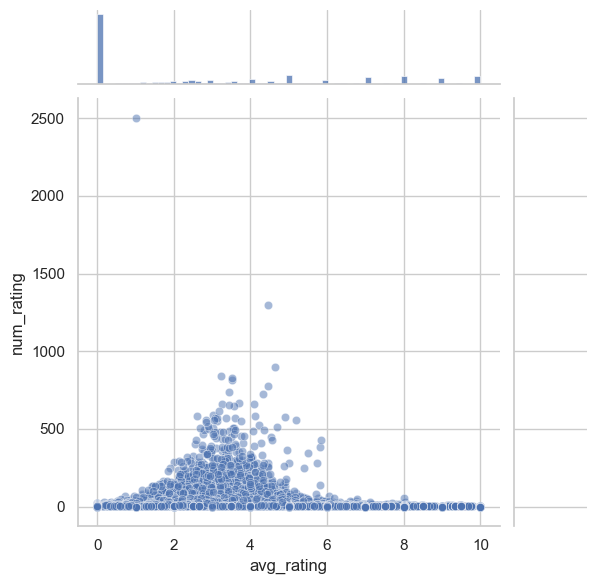

In [62]:
sns.jointplot(x='avg_rating',y='num_rating',data=popular,alpha=0.5)

In [63]:
book

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [64]:
user

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [65]:
rating

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [69]:
df_merged = rating.merge(book,how='inner',on='ISBN')
df_merged = df_merged.merge(user,how='inner',on='user_id')
df_merged

,user_id,ISBN,rating,title,author,year,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany""",NaN
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa",13.0


In [70]:
df_merged.shape

(1031136, 9)

In [71]:
len(df_merged['title'].unique())


241071

In [72]:
len(df_merged['ISBN'].unique())


270151

In [73]:
len(df_merged['user_id'].unique())


92106

In [74]:
# defining a function to extarct the country names
def get_country(x):
  return x.split(',')[-1]

In [75]:
#applying the function the location column
df_location = user.copy(deep=True)
df_location['country'] = user['location'].apply(get_country)

In [77]:
df_merged['location'] = df_merged['location'].apply(get_country)

In [79]:
# Create age groups using age column
bins = [-1,12,20,50,100]
labels = ['Kid','Teenager','Adult','Old']
df_merged['age_bins'] = pd.cut(x=df_merged['age'], bins=bins,labels=labels)

In [80]:
#Identifying what % of customers are coming from different countries
df_location = pd.DataFrame(df_location.country.value_counts(normalize=True)).reset_index()
df_location.columns = ['countries','value_counts']

#Labeling countries with low customer % as other
df_location['countries'] = df_location.apply(lambda x: 'other' if (x['value_counts'] < 0.01 or x['countries'] == '') else x['countries'],axis=1)

#Grouping the customer % from 'other' countries 
df_location = df_location.groupby('countries')['value_counts'].sum().reset_index()
     

In [81]:

#Every country has now just one occurance
df_location.countries.value_counts()

 australia         1
 canada            1
 france            1
 germany           1
 italy             1
 netherlands       1
 new zealand       1
 portugal          1
 spain             1
 united kingdom    1
 usa               1
other              1
Name: countries, dtype: int64

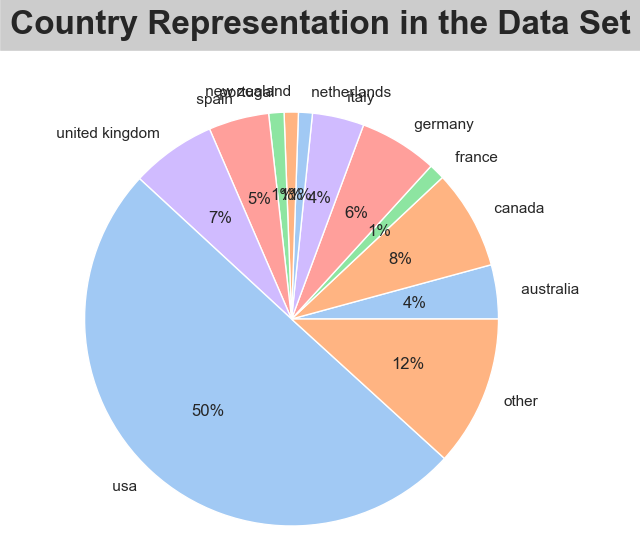

In [82]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("Country Representation in the Data Set",bbox={'facecolor':'0.8', 'pad':8},fontsize=24, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(df_location['value_counts'], labels = df_location['countries'], colors = colors, autopct='%.0f%%',radius=1.4)
     

In [83]:
# Visualizing the rating counts of the users. 
df_merged_updated['Rating-Count'].hist(bins=[0,5,10,20,30,40,50,60,70,80,90,100])
     

NameError: name 'df_merged_updated' is not defined